# WeatherPy
----



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import openweathermapy.core as owm
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [3]:
#load URL for api and uits
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#query_url = f"{url}appid={api_key}&units={units}&q="

In [7]:
#create emptiy list for weather 
temp = []
Humidity =[]
Cloudiness = []
winspeed = []
lat = []
lon = []
#create a loop to go thew len(cities)and query_url and json query for each city and append the empty list.
for city in range(len(cities)):
    query_url = f"{url}appid={api_key}&units={units}&q={cities[city]}"
    response = requests.get(query_url).json()
    try:
        
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        Humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        winspeed.append(response['wind']['speed'])
        Cloudiness.append(response['clouds']['all'])
        print(f"data recived #{city} now get to work :{cities[city]}")
    except KeyError:
        print("spooon")

data recived #0 now get to work :itarema
data recived #1 now get to work :mataura
data recived #2 now get to work :busselton
data recived #3 now get to work :rikitea
spooon
data recived #5 now get to work :cherskiy
data recived #6 now get to work :ushuaia
data recived #7 now get to work :vostok
data recived #8 now get to work :kangaatsiaq
data recived #9 now get to work :lebu
data recived #10 now get to work :hirara
data recived #11 now get to work :cape town
data recived #12 now get to work :aklavik
data recived #13 now get to work :eaton socon
data recived #14 now get to work :nizwa
data recived #15 now get to work :kahului
data recived #16 now get to work :tuktoyaktuk
data recived #17 now get to work :kodiak
data recived #18 now get to work :cap-aux-meules
data recived #19 now get to work :kupang
data recived #20 now get to work :hobart
data recived #21 now get to work :severo-kurilsk
data recived #22 now get to work :imeni vorovskogo
data recived #23 now get to work :chuy
data reci

spooon
data recived #212 now get to work :syava
data recived #213 now get to work :saint-philippe
data recived #214 now get to work :huicheng
data recived #215 now get to work :carnarvon
data recived #216 now get to work :puerto carreno
data recived #217 now get to work :cabo san lucas
data recived #218 now get to work :agnibilekrou
data recived #219 now get to work :north bend
data recived #220 now get to work :alofi
data recived #221 now get to work :limbang
data recived #222 now get to work :rocha
data recived #223 now get to work :pochutla
data recived #224 now get to work :makokou
data recived #225 now get to work :busayra
data recived #226 now get to work :tual
data recived #227 now get to work :aswan
data recived #228 now get to work :concordia
data recived #229 now get to work :sitka
data recived #230 now get to work :tautira
data recived #231 now get to work :fortuna
spooon
data recived #233 now get to work :camacha
data recived #234 now get to work :takoradi
data recived #235

data recived #416 now get to work :xacmaz
data recived #417 now get to work :high level
data recived #418 now get to work :marabba
data recived #419 now get to work :tandil
data recived #420 now get to work :lahan
data recived #421 now get to work :ous
data recived #422 now get to work :bouna
data recived #423 now get to work :abhar
data recived #424 now get to work :maniitsoq
data recived #425 now get to work :pemberton
data recived #426 now get to work :vao
data recived #427 now get to work :jimma
data recived #428 now get to work :hovd
data recived #429 now get to work :vallenar
data recived #430 now get to work :nikologory
data recived #431 now get to work :ukiah
data recived #432 now get to work :boffa
data recived #433 now get to work :hervey bay
data recived #434 now get to work :xining
data recived #435 now get to work :viedma
data recived #436 now get to work :jalu
data recived #437 now get to work :ust-karsk
data recived #438 now get to work :urusha
data recived #439 now get 

data recived #614 now get to work :chalus
data recived #615 now get to work :tongliao
data recived #616 now get to work :mount gambier
data recived #617 now get to work :baijiantan
data recived #618 now get to work :vardo


In [8]:
#will create a verable list with cities and emtpy lists and group them with colums in to a data frame 
weather_zip = list(zip(cities, lat,lon, temp,Humidity,winspeed,Cloudiness))
weather_coloms = ["city","lat","lon","temp max","Humidity","Wind Speed","Cloudiness"]
weather_df = pd.DataFrame(weather_zip, columns=weather_coloms)


weather_df.head()

,city,lat,lon,temp max,Humidity,Wind Speed,Cloudiness
0,itarema,-2.92,-39.92,76.90,94,4.07,88
1,mataura,-46.19,168.86,61.00,83,1.01,44
2,busselton,-33.64,115.35,50.00,63,17.72,48
3,rikitea,-23.12,-134.97,79.06,98,17.72,48
4,ambodifototra,68.75,161.30,-15.72,23,3.18,0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature')

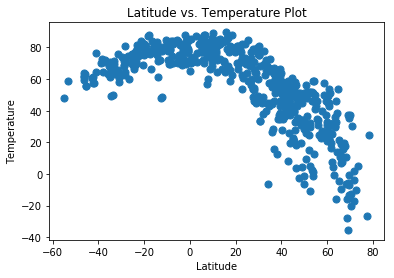

In [9]:


weather_df.plot.scatter(x="lat", y="temp max" ,s=50)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")


#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

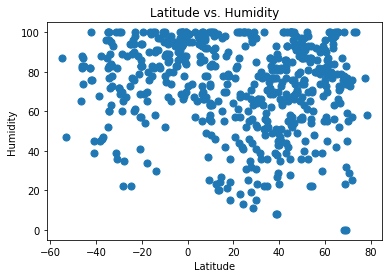

In [10]:
weather_df.plot.scatter(x="lat", y="Humidity" ,s=50)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

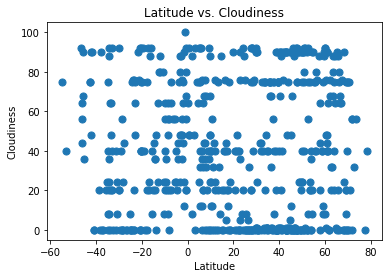

In [11]:
weather_df.plot.scatter(x="lat", y="Cloudiness" ,s=50)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

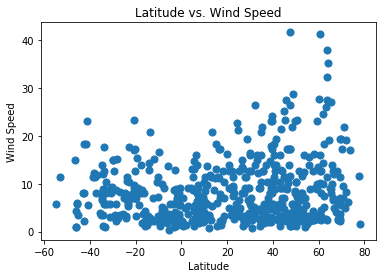

In [12]:
weather_df.plot.scatter(x="lat", y="Wind Speed" ,s=50)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")